## Listwise deletion

In [1]:
# Drop rows that have any missing data
data.dropna(inplace=True) 

NameError: name 'data' is not defined

## Pairwise deletion
we only remove rows when there are missing values in the variables we are directly analyzing

In [ ]:

data.dropna(subset=['Height','Education'], #only looks at these two columns
            inplace=True, #removes the rows and keeps the data variable
            how='any') #removes data with missing data in either field

## Types of missing data

Structurally Missing Data we expect this data to be missing for some logical reason

Missing Completely at Random (MCAR) the probability of any datapoint being MCAR is the same for all data points – this type of missing data is mostly hypothetical

Missing at Random (MAR) the probability of any data point being MAR is the same within groups of the observed data – this is much more realistic than MCAR

Missing Not at Random (MNAR) there is some reason why the data is missing



## Filling missing data

Last Observation Carried Forward (LOCF)

Next Observation Carried Backward (NOCB)

Baseline Observation Carried Forward (BOCF). the initial values for a given variable are applied to missing values. Common for medical studies

In [ ]:
df['comfort'].ffill(axis=0, inplace=True)
# Applying Forward Fill (another name for LOCF) on the comfort column

df['comfort'].bfill(axis=0, inplace=True)
# Applying Backward Fill (another name for NOCB) on the comfort column

# Isolate the first (baseline) value for our data
baseline = df['concentration'][0]

# Replace missing values with our baseline value
df['concentration'].fillna(value=baseline, inplace=True)


## Multiple imputation

Multiple imputation is a technique for filling in missing data, in which we replace the missing data multiple times. Multiple imputation, in particular, is used when we have missing data across multiple categorical columns in our dataset. After we have tried different values, we use an algorithm to pick the best values to replace our missing data. 

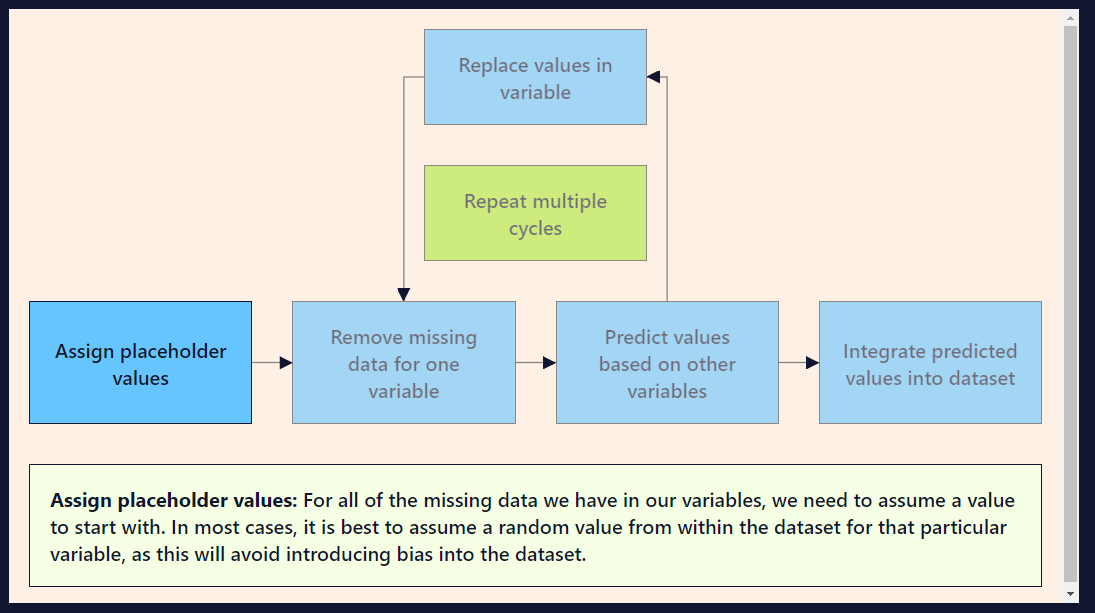

In [2]:
# IterativeImputer Module can help with Multiple Imputation

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd

# Create the dataset as a Python dictionary
d = {
    'X': [5.4,13.8,14.7,17.6,np.nan,1.1,12.9,3.4,np.nan,10.2],
    'Y': [18,27.4,np.nan,18.3,49.6,48.9,np.nan,13.6,16.1,42.7],
    'Z': [7.6,4.6,4.2,np.nan,4.7,8.5,3.5,np.nan,1.8,4.7]
}

dTest = {
    'X': [13.1, 10.8, np.nan, 9.7, 11.2],
    'Y': [18.3, np.nan, 14.1, 19.8, 17.5],
    'Z': [4.2, 3.1, 5.7,np.nan, 9.6]
}

# Create the pandas DataFrame from our dictionary
df = pd.DataFrame(data=d)
dfTest = pd.DataFrame(data=dTest)

# Create the IterativeImputer model to predict missing values
imp = IterativeImputer(max_iter=10, random_state=0)

# Fit the model to the test dataset
imp.fit(dfTest)

# Transform the model on the entire dataset
dfComplete = pd.DataFrame(np.round(imp.transform(df),1), columns=['X','Y','Z'])

print(dfComplete.head(10))


      X     Y    Z
0   5.4  18.0  7.6
1  13.8  27.4  4.6
2  14.7  17.4  4.2
3  17.6  18.3  5.6
4  11.2  49.6  4.7
5   1.1  48.9  8.5
6  12.9  17.4  3.5
7   3.4  13.6  5.7
8  11.2  16.1  1.8
9  10.2  42.7  4.7
